In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the train and test data

In [156]:
df_train = pd.read_csv("train.csv")

In [157]:
df_test = pd.read_csv("test.csv")

<b> Look at the train and test dataset</b>

In [158]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [160]:
#summary of train data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [161]:
#summary of test data
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [162]:
#Check for missing values in train data
df_train.isna().sum()/len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Age has about 20% missing values, Cabin has 78% missing values. Let's drop the Cabin column from both train and test data sets. Whatever changes you make to the train dataset must be applies to the test dataset.

In [163]:
train = df_train.drop(columns=["Cabin"],axis=1)

In [164]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [165]:
test = df_test.drop(columns=["Cabin"],axis =1)

In [166]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [167]:
train["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

around 60% of training set did not survive. Where as 38-39% did survive

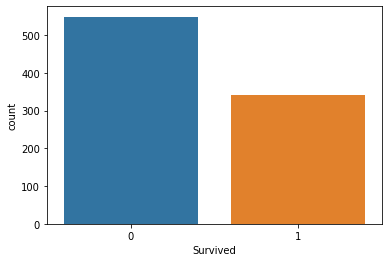

In [168]:
import seaborn as sns
sns.countplot(train['Survived'],label="Count")
plt.show()

Let us look at the data types for each column

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<b>Let us find the survival rate with respect to the other columns</b>

In [170]:
def survivalrate(feature,target,df):
    rate = target.groupby(feature).mean()
    return rate   

In [171]:
survivalrate(train["Pclass"],train["Survived"],train)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [172]:
survivalrate(train["SibSp"],train["Survived"],train)

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [173]:
survivalrate(train["Parch"],train["Survived"],train)

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [174]:
survivalrate(train["Embarked"],train["Survived"],train)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [175]:
survivalrate(train["Sex"],train["Survived"],train)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [176]:
def plot(feature,target):
    p = sns.countplot(feature,hue = target)
    return p

Plot the features

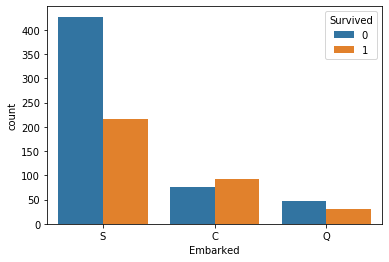

In [177]:
plot(train["Embarked"],train["Survived"])

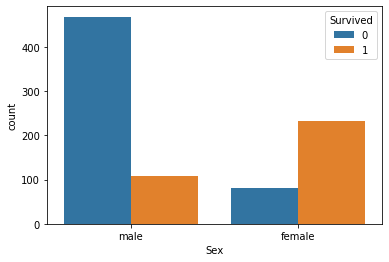

In [178]:
plot(train["Sex"],train["Survived"])

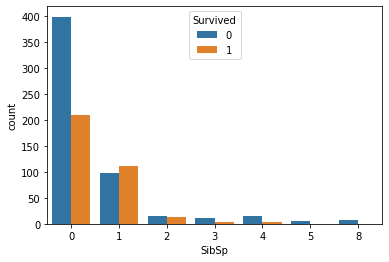

In [179]:
plot(train["SibSp"],train["Survived"])

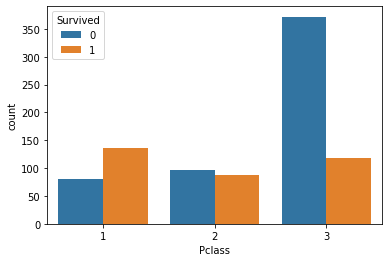

In [180]:
plot(train["Pclass"],train["Survived"])

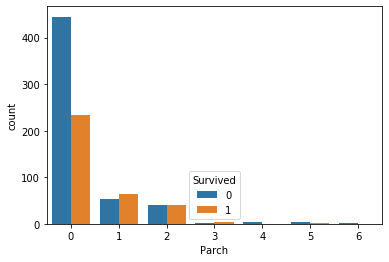

In [181]:
plot(train["Parch"],train["Survived"])

In [182]:
#Check for missing values
train.isna().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [183]:
#Check for missing values
test.isna().sum()/len(test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Embarked       0.000000
dtype: float64

<b>Fill in the missing values for age with the mean</b>

In [184]:
train['Age'].fillna((train['Age'].mean()), inplace=True)

In [185]:
train.isna().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

<b> Fill in the missing values for Embarked with the most repetative value for that column</b>

In [186]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [187]:
train['Embarked'] = train['Embarked'].fillna('S')

In [188]:
train.isna().sum()/len(train)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

train df doesn't have any missing values now.

In [189]:
test.isna().sum()/len(test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Embarked       0.000000
dtype: float64

In [190]:
test['Age'].fillna((test['Age'].mean()), inplace=True)

In [191]:
test["Fare"].fillna((test["Fare"].mean()),inplace = True)

In [192]:
test.isna().sum()/len(test)

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

Create a new column called Title that will extract information from "Name"

In [193]:
def title(x):
    if 'Mr.' in x:
        return 'Mr'
    elif 'Mrs.' in x:
        return 'Mrs'
    elif 'Master' in x:
        return 'Master'
    elif 'Miss.' in x:
        return 'Miss'
    else:
        return 'Other'

In [194]:
# feature for the title of each person
train['Title'] = train['Name'].apply(title)

train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [195]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [196]:
# feature for the title of each person
test['Title'] = test['Name'].apply(title)

test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Title, dtype: int64

In [197]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


We know that Age can be split into different groups.

In [198]:
# Fixed Width Binning (Kid, Teen, Adult, Elderly)
bins = [0,12,17,60,150]
labels = ["kid","teen","adult","elderly"]
train['AgeGroup'] = pd.cut(train.Age,bins=bins,labels=labels)
train[['Age','AgeGroup']].head(10)

,Age,AgeGroup
0,22.000000,adult
1,38.000000,adult
2,26.000000,adult
3,35.000000,adult
4,35.000000,adult
5,29.699118,adult
6,54.000000,adult
7,2.000000,kid
8,27.000000,adult
9,14.000000,teen


In [199]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,adult


In [200]:
# Fixed Width Binning (Kid, Teen, Adult, Elderly)
bins = [0,12,17,60,150]
labels = ["kid","teen","adult","elderly"]
test['AgeGroup'] = pd.cut(test.Age,bins=bins,labels=labels)
test[['Age','AgeGroup']].head(10)

,Age,AgeGroup
0,34.5,adult
1,47.0,adult
2,62.0,elderly
3,27.0,adult
4,22.0,adult
5,14.0,teen
6,30.0,adult
7,26.0,adult
8,18.0,adult
9,21.0,adult


In [201]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,elderly
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,adult


In [202]:
train_cat = train.select_dtypes(include=['object','category'])
train_cat.head()

,Name,Sex,Ticket,Embarked,Title,AgeGroup
0,"Braund, Mr. Owen Harris",male,A/5 21171,S,Mr,adult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,Mrs,adult
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,Miss,adult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,Mrs,adult
4,"Allen, Mr. William Henry",male,373450,S,Mr,adult


In [203]:
test_cat = test.select_dtypes(include=['object','category'])
test_cat.head()

,Name,Sex,Ticket,Embarked,Title,AgeGroup
0,"Kelly, Mr. James",male,330911,Q,Mr,adult
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,S,Mrs,adult
2,"Myles, Mr. Thomas Francis",male,240276,Q,Mr,elderly
3,"Wirz, Mr. Albert",male,315154,S,Mr,adult
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,S,Mrs,adult


<b>Apply one hot encoding for Columns that contain categorical values</b>

In [204]:
train = pd.get_dummies(train,prefix= ["Sex"],columns=["Sex"])

In [205]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,Mr,adult,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,Mrs,adult,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,adult,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,Mrs,adult,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,Mr,adult,0,1


In [206]:
train = pd.get_dummies(train,prefix=["Embarked"],columns =["Embarked"])

In [207]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Title,AgeGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,adult,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,adult,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,adult,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,adult,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,adult,0,1,0,0,1


In [208]:
train = pd.get_dummies(train,prefix=["Pclass"],columns =["Pclass"])

In [209]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Title,AgeGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,adult,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,adult,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,adult,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,adult,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,adult,0,1,0,0,1,0,0,1


In [210]:
train = pd.get_dummies(train,prefix=["Age"],columns =["AgeGroup"])

In [211]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_kid,Age_teen,Age_adult,Age_elderly
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,0,...,0,0,1,0,0,1,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,1,...,1,0,0,1,0,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,1,...,0,0,1,0,0,1,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,1,...,0,0,1,1,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,0,...,0,0,1,0,0,1,0,0,1,0


In [212]:
test = pd.get_dummies(test,prefix=["Age"],columns=["AgeGroup"])

In [213]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_kid,Age_teen,Age_adult,Age_elderly
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,0,0,1,0


In [214]:
test = pd.get_dummies(test,prefix=["Embarked"],columns=["Embarked"])

In [215]:
test = pd.get_dummies(test,prefix=["Pclass"],columns=["Pclass"])

In [216]:
test = pd.get_dummies(test,prefix=["Sex"],columns=["Sex"])

In [217]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Title,Age_kid,Age_teen,Age_adult,Age_elderly,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Mr,0,0,1,0,0,1,0,0,0,1,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,Mrs,0,0,1,0,0,0,1,0,0,1,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Mr,0,0,0,1,0,1,0,0,1,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,Mr,0,0,1,0,0,0,1,0,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,Mrs,0,0,1,0,0,0,1,0,0,1,1,0


In [218]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Combine the columns SibSp and Parch to identify if a person is travelling alone or not. If alone then 1, if not then 0

In [219]:
def is_alone(cols):
    SibSp = cols[0]
    Parch = cols[1]
    total_family = SibSp + Parch
    if(total_family == 0):
        return 1
    else:
        return 0

In [220]:
train['IsAlone'] = train[['SibSp', 'Parch']].apply(is_alone, axis=1)
test['IsAlone'] = test[['SibSp', 'Parch']].apply(is_alone, axis=1)

In [221]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Title,Sex_female,...,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_kid,Age_teen,Age_adult,Age_elderly,IsAlone
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,0,...,0,1,0,0,1,0,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,1,...,0,0,1,0,0,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,1,...,0,1,0,0,1,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,1,...,0,1,1,0,0,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,0,...,0,1,0,0,1,0,0,1,0,1


In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Title        891 non-null    object 
 9   Sex_female   891 non-null    uint8  
 10  Sex_male     891 non-null    uint8  
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
 14  Pclass_1     891 non-null    uint8  
 15  Pclass_2     891 non-null    uint8  
 16  Pclass_3     891 non-null    uint8  
 17  Age_kid      891 non-null    uint8  
 18  Age_teen     891 non-null    uint8  
 19  Age_adul

In [223]:
train.Title.value_counts().sort_values(ascending=True)

Other      27
Master     40
Mrs       125
Miss      182
Mr        517
Name: Title, dtype: int64

In [69]:
survivalrate(train["Title"],train["Survived"],train)

Title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
Other     0.444444
Name: Survived, dtype: float64

Title Mrs had a higher chance of Survival followed by Miss, Master, Other and Mr

In [70]:
train = pd.get_dummies(train,prefix=["Title"],columns =["Title"])

In [71]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Age_kid,Age_teen,Age_adult,Age_elderly,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,...,0,0,1,0,0,0,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,...,0,0,1,0,0,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,...,0,0,1,0,1,0,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,...,0,0,1,0,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,...,0,0,1,0,1,0,0,1,0,0


In [84]:
test = pd.get_dummies(test,prefix=["Title"],columns =["Title"])

In [85]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,IsAlone,Age_kid,Age_teen,...,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,0,...,0,0,1,0,1,0,0,1,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Name          418 non-null    object 
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Ticket        418 non-null    object 
 6   Fare          418 non-null    float64
 7   IsAlone       418 non-null    int64  
 8   Age_kid       418 non-null    uint8  
 9   Age_teen      418 non-null    uint8  
 10  Age_adult     418 non-null    uint8  
 11  Age_elderly   418 non-null    uint8  
 12  Embarked_C    418 non-null    uint8  
 13  Embarked_Q    418 non-null    uint8  
 14  Embarked_S    418 non-null    uint8  
 15  Pclass_1      418 non-null    uint8  
 16  Pclass_2      418 non-null    uint8  
 17  Pclass_3      418 non-null    uint8  
 18  Sex_female    418 non-null    

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Name          891 non-null    object 
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Ticket        891 non-null    object 
 7   Fare          891 non-null    float64
 8   Sex_female    891 non-null    uint8  
 9   Sex_male      891 non-null    uint8  
 10  Embarked_C    891 non-null    uint8  
 11  Embarked_Q    891 non-null    uint8  
 12  Embarked_S    891 non-null    uint8  
 13  Pclass_1      891 non-null    uint8  
 14  Pclass_2      891 non-null    uint8  
 15  Pclass_3      891 non-null    uint8  
 16  Age_kid       891 non-null    uint8  
 17  Age_teen      891 non-null    uint8  
 18  Age_adult     891 non-null    

In [93]:
newest_train = train.drop(columns=["PassengerId","Name","Age","SibSp","Parch","Ticket"])

In [94]:
newest_train.head()

,Survived,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_kid,Age_teen,Age_adult,Age_elderly,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,7.2500,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,1,71.2833,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,7.9250,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
3,1,53.1000,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,8.0500,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0


In [95]:
new_test = test.drop(columns=["PassengerId","Name","Age","SibSp","Parch","Ticket"])

In [96]:
new_test.head()

,Fare,IsAlone,Age_kid,Age_teen,Age_adult,Age_elderly,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,7.8292,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1,7.0000,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
2,9.6875,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
3,8.6625,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
4,12.2875,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0


In [224]:
X = newest_train.drop(columns=['Survived'], axis=1)
y = newest_train['Survived']

In [225]:
X.head()

,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_kid,Age_teen,Age_adult,Age_elderly,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,7.2500,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,71.2833,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,7.9250,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
3,53.1000,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,8.0500,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0


In [226]:
from sklearn import preprocessing
# standardize the data attributes
X_scaled = preprocessing.scale(X)

In [227]:
X_scaled

array([[-0.50244517, -0.73769513,  0.73769513, ...,  0.85053175,
        -0.4039621 , -0.1767767 ],
       [ 0.78684529,  1.35557354, -1.35557354, ..., -1.17573506,
         2.47547975, -0.1767767 ],
       [-0.48885426,  1.35557354, -1.35557354, ..., -1.17573506,
        -0.4039621 , -0.1767767 ],
       ...,
       [-0.17626324,  1.35557354, -1.35557354, ..., -1.17573506,
        -0.4039621 , -0.1767767 ],
       [-0.04438104, -0.73769513,  0.73769513, ...,  0.85053175,
        -0.4039621 , -0.1767767 ],
       [-0.49237783, -0.73769513,  0.73769513, ...,  0.85053175,
        -0.4039621 , -0.1767767 ]])

In [228]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [229]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.80      0.69      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [231]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[138,  19],
       [ 34,  77]])

<b>learning curve</b>

A learning curve is used to evaluate train and validation scores to check for signs of overfitting. 

<b>Rule of Thumb:</b>

When tuning these other parameters, we may to first study the effects of each parameter on the learning curves.

By examining the learning curve you can start to see the effects of each parameter and apply a grid search to find optimal model parameters.


In [232]:
# Create empty array to store results
results = []

# Create watchlist to keep track of train/validation performance
eval_set = [(X_train, y_train), (X_test, y_test)]

<b> For max depth</b>

In [233]:
from sklearn import metrics
import xgboost as xgb
# Enumerate through different max_depth values and store results
for max_depth in [2,3,4,5,10,12,15]:
    cf = xgb.XGBRegressor(max_depth=max_depth)
    cf.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(y_train, cf.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, cf.predict(X_test))
        })
    
# Display Results
max_depth_lr = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lr

[16:37:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train_error,test_error
max_depth,,
2,0.108051,0.134869
3,0.083823,0.134044
4,0.065986,0.137167
5,0.056485,0.137143
10,0.041919,0.157881
12,0.041809,0.159722
15,0.041786,0.160683


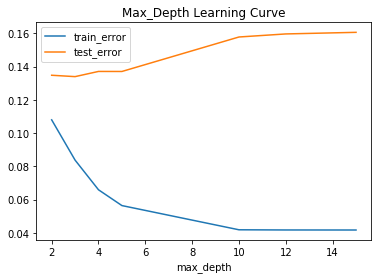

In [234]:
# Plot Max_Depth Learning Curve
max_depth_lr.plot(title="Max_Depth Learning Curve")

In [235]:
# Reset results array
results = []

for learning_rate in [0.05,0.1,0.2,0.4,0.6,0.8,1]:
    clf = xgb.XGBRegressor(max_depth=2,learning_rate=learning_rate, n_estimators=200)
    clf.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'learning_rate': learning_rate,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, clf.predict(X_test))
        })
    
learning_rate_lr = pd.DataFrame(results).set_index('learning_rate').sort_index()
learning_rate_lr

[16:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train_error,test_error
learning_rate,,
0.05,0.108218,0.134568
0.10,0.094643,0.137163
0.20,0.079498,0.137493
0.40,0.065626,0.143455
0.60,0.059287,0.152690
0.80,0.056824,0.156503
1.00,0.053900,0.152762


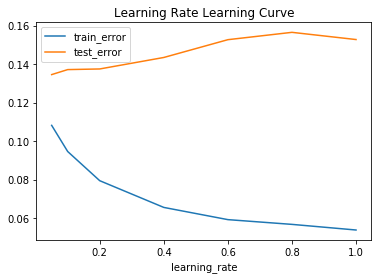

In [236]:
# Plot Learning Rate
learning_rate_lr.plot(title="Learning Rate Learning Curve")

In [237]:
# Reset results array
results = []

for n_estimators in [50,60,100,150,200,500,750,1000, 1500]:
    clf = xgb.XGBRegressor(max_depth=2,learning_rate=0.10, n_estimators=n_estimators)
    clf.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'n_estimators': n_estimators,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, clf.predict(X_test))
        })
    
n_estimators_lr = pd.DataFrame(results).set_index('n_estimators').sort_index()
n_estimators_lr

[16:39:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,train_error,test_error
n_estimators,,
50,0.119556,0.137629
60,0.116888,0.136421
100,0.108051,0.134869
150,0.100199,0.135687
200,0.094643,0.137163
500,0.076001,0.139356
750,0.068848,0.143486
1000,0.064142,0.146944
1500,0.058930,0.151711


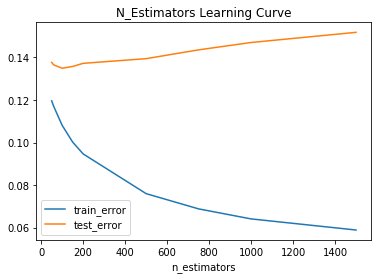

In [238]:
n_estimators_lr.plot(title="N_Estimators Learning Curve")

In [239]:
model = xgb.XGBRegressor()

In [240]:
# Define Parameters
param_grid = {"max_depth": [3,5,10],
              "max_features" : [1.0,0.3,0.1],
              "min_samples_leaf" : [3,5,9],
              "n_estimators": [100,150,200],
              "learning_rate": [0.05,0.1,0.02,0.2]}

In [241]:
from sklearn.model_selection import GridSearchCV
gs_cv = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=10, n_jobs=-1 ).fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

[16:43:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  1.1min finished


In [242]:
gs_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=3, max_features=1.0, min_child_weight=1,
             min_samples_leaf=3, missing=None, n_estimators=150, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [243]:
best_model=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=3, max_features=1.0, min_child_weight=1,
             min_samples_leaf=3, missing=None, n_estimators=150, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [244]:
# Create eval_set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit our model to the training set
best_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Make predictions with test data
y_pred = best_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[16:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 81.72%


In [245]:
X_newest_test = new_test
X_newest_test_scaled = preprocessing.scale(X_newest_test)

best_model_pred = best_model.predict(X_newest_test_scaled)
pred = [round(value) for value in best_model_pred]

In [246]:
pred

[0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0

In [247]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })

submission.to_csv('submission.csv', index=False)